# Decision Tree model
 - 중요변수 선정 기준 : GINI, Entropy
 - GINI : 불확실성을 개선하는데 기여하는 척도
 - Entropy : 불확실성을 나타내는 척도
 - both 작을수록 불확실성도 낮다.

In [1]:
# 패키지설치

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_wine
from sklearn.tree import DecisionTreeClassifier, export_graphviz  # tree model
from sklearn.metrics import accuracy_score, confusion_matrix
# tree 시각화 관련
from sklearn.tree.export import export_text  # tree 구조 텍스트
from sklearn import tree


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
iris = load_iris()
iris.target_names  # array(['setosa', 'versicolor', 'virginica'], dtype='<U10')
name = iris.feature_names


X = iris.data
y = iris.target

X.shape  # (150, 4)
y.shape  # (150,)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# help(DecisionTreeClassifier)

# model 생성
dtc = DecisionTreeClassifier(criterion='gini', random_state=123, max_depth=3)
model = dtc.fit(X=x_train, y=y_train)


dtc2 = DecisionTreeClassifier(criterion='entropy') # default max_Depth=6
model2 = dtc2.fit(X=x_train, y=y_train)


|--- petal length (cm) <= 2.60
|   |--- class: 0
|--- petal length (cm) >  2.60
|   |--- petal width (cm) <= 1.65
|   |   |--- petal length (cm) <= 5.00
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  5.00
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.65
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



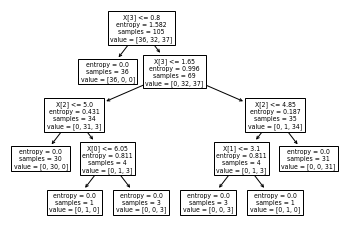

In [6]:
# tree 모델 시각화
tree.plot_tree(model)
tree.plot_tree(model2)

print(export_text(model, name))

In [7]:
y_pred = model.predict(x_test)
y_true = y_test

acc = accuracy_score(y_true,y_pred)
acc # 0.9555555555555556
con_max = confusion_matrix(y_true, y_pred)
con_max


y_pred2 = model2.predict(x_test)
y_true2 = y_test

acc2 = accuracy_score(y_true2,y_pred2)
acc2 # 0.9555555555555556  max_depth=6
con_max2 = confusion_matrix(y_true2, y_pred2)
con_max2


array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [ ]:

##########################
### model overfitting ###
#########################

wine = load_wine()

X = wine.data
y = wine.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)



# model 1 : max_depth=5
dt = DecisionTreeClassifier()
model = dt.fit(x_train,y_train)

train_score = model.score(x_train,y_train)
test_score = model.score(x_test,y_test)

print(train_score,test_score)
# 1.0 , 0.9074074074074074

tree.plot_tree(model)
print(export_text(model))



# model 2 : max_depth=3
dt = DecisionTreeClassifier(max_depth=3)
model = dt.fit(x_train,y_train)

train_score = model.score(x_train,y_train)
test_score = model.score(x_test,y_test)

print(train_score,test_score)
# 0.9838709677419355 , 0.9629629629629629

tree.plot_tree(model)
print(export_text(model))


export_graphviz(model, out_file='DT_tree_graph.dot',
                max_depth=3,
                class_names=True)
